Load and analyze dataset created by PetFinder_Search.ipynb. 

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
dtype={'age': 'str',
       'declawed': 'boolean',
       'house_trained': 'boolean',
       'shots_current': 'boolean',
       'spayed_neutered': 'boolean',
       'special_needs': 'boolean',
       'breed_mixed': 'str',
       'breed_primary': 'str',
       'breed_secondary': 'str',
       'breed_unknown': 'str',
       'size': 'str',
       'coat': 'str',
       'color_primary': 'str',
       'color_secondary': 'str',
       'description': 'str',
       'good_with_cats': 'boolean',
       'good_with_children': 'boolean',
       'good_with_dogs': 'boolean',
       'gender': 'str',
       'id': "int64",
       'organization_id': 'str',
       'status': "str",
       'publish_date': 'str',
       'status_change_date': 'str',
       "time_to_adoption": 'int64'}

#bool_cols = ['declawed','house_trained','shots_current','spayed_neutered','special_needs','good_with_cats','good_with_children','good_with_dogs']

In [149]:
data_dir = '/content/drive/My Drive/Data_Science_Projects/PetFinder/'
csv_name = data_dir+'Adopted_pets.csv'
df = pd.read_csv(csv_name, low_memory=False, dtype=dtype)

#df.shape
#df['time_to_adoption'].value_counts()
#df['id'].nunique()
#df.info(memory_usage="deep")

In [115]:
# Find Missing Data 
def find_missing_data(df):
  total = len(df)
  for column in df.columns:
      if df[column].isna().sum() != 0:
          print("{} has: {:,} ({:.2}%) missing values.".format(column, df[column].isna().sum(), 
                                                              (df[column].isna().sum()/total)*100))

In [151]:
## Make column "longer_than_30_days". True of time_to_adoption is longer than 30 days, False otherwise
## Make column "longer_than_60_days". True of time_to_adoption is longer than 60 days, False otherwise

df['longer_than_30_days'] = df['time_to_adoption'] > 30.
df['longer_than_60_days'] = df['time_to_adoption'] > 60.

## Make column "adoption_time_category". 
## Set to 0 if adoption time < 30 days
## Set to 1 if 30days < adoption time < 60 days
## Set to 2 if adoption time > 60 days

df['adoption_time_category'] = 0
df.loc[df['longer_than_30_days'] == True, 'adoption_time_category'] = 1
df.loc[df['longer_than_60_days'] == True, 'adoption_time_category'] = 2

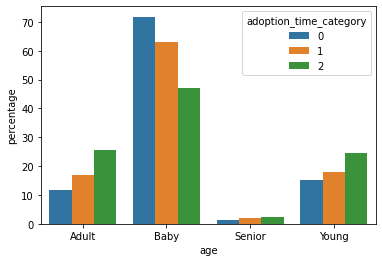

In [107]:
## How does the percentage of each age group change 30 and 60 days after profile published?
## It appears like the percentage of baby animals decreased, and other categories increased, 
## indicating that baby animals are adopted more quickly
age_counts = (df.groupby(['adoption_time_category'])['age']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('age'))
p = sns.barplot(x="age", y="percentage", hue="adoption_time_category", data=age_counts)
#_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

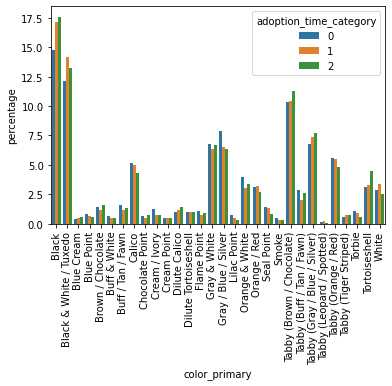

In [108]:
## How does the percentage of each color group change 30 and 60 days after profile published?
## Nothing really obvoius here, but it does look like black animals are more common, their percentage also increase with time

color_counts = (df.groupby(['adoption_time_category'])['color_primary']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('color_primary'))
p = sns.barplot(x="color_primary", y="percentage", hue="adoption_time_category", data=color_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

[Text(0, 0.5, 'Median Time to Adoption'), Text(0.5, 0, 'Age')]

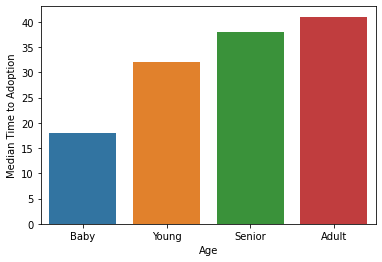

In [132]:
## How does age affect the median time to adoption?
## As expected, baby animals have a shortr median time to adoption, 
## adult and seniors have longer median time to adoption

age_time_to_adoption = (df.groupby(['age'])['time_to_adoption']
                     .median()
                     .reset_index()
                     .sort_values('time_to_adoption'))
p = sns.barplot(x="age", y="time_to_adoption", data=age_time_to_adoption)
p.set(xlabel='Age', ylabel='Median Time to Adoption')

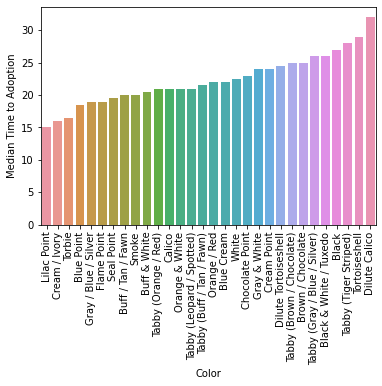

In [131]:
## How does color of animal affect the median time to adoption?

color_time_to_adoption = (df.groupby(['color_primary'])['time_to_adoption']
                     .median()
                     .reset_index()
                     .sort_values('time_to_adoption'))
p = sns.barplot(x="color_primary", y="time_to_adoption", data=color_time_to_adoption)
p.set(xlabel='Color', ylabel='Median Time to Adoption')
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

In [74]:
## Create a grid of age vs. color and each category's median time to adoption
df_grouped_age_color = df.groupby(['age', 'color_primary']).agg({'time_to_adoption': ['median']}).reset_index()
df_grouped_age_color_pivot = df_grouped_age_color.pivot(index='color_primary', columns='age')
cols = df_grouped_age_color_pivot.columns.tolist()
cols = [('time_to_adoption', 'median', 'Baby'), ('time_to_adoption', 'median', 'Young'), ('time_to_adoption', 'median', 'Adult'), ('time_to_adoption', 'median', 'Senior')]
df_grouped_age_color_pivot = df_grouped_age_color_pivot[cols]
print(df_grouped_age_color_pivot)

                             time_to_adoption                   
                                       median                   
age                                      Baby Young Adult Senior
color_primary                                                   
Black                                    22.0  36.0  53.0   47.0
Black & White / Tuxedo                   22.0  43.0  36.5   33.0
Blue Cream                               16.0  32.0  37.0   63.0
Blue Point                               13.0  10.0  39.0   43.0
Brown / Chocolate                        14.0  29.0  44.5  111.5
Buff & White                             19.0  25.5  13.0  147.5
Buff / Tan / Fawn                        17.0  19.0  33.0   26.5
Calico                                   18.0  25.0  33.5   29.5
Chocolate Point                          20.0  28.0  47.0   28.0
Cream / Ivory                            14.0  15.0  21.0   52.0
Cream Point                               8.0  51.0  63.0  118.0
Dilute Calico            

In [152]:
## Select columns to use in data analysis
cols_to_use = ['age','declawed','house_trained','shots_current','spayed_neutered',
               'special_needs','size','coat','color_primary', 'good_with_cats','good_with_children',
               'good_with_dogs','gender','time_to_adoption','longer_than_30_days','longer_than_60_days',
               'adoption_time_category']
df = df[cols_to_use]

## Set boolean columns to 0 and 1
bool_cols = bool_cols + ['longer_than_30_days','longer_than_60_days']
df[bool_cols] = df[bool_cols].fillna(False)
df[bool_cols] = df[bool_cols].astype(int)

## Assume coat is short hair (most common) if none is given
df['coat'] = df['coat'].fillna('Short') 

## Fill NA in color_primary with Unknown
df['color_primary'] = df['color_primary'].fillna('Unknown') 

#df.head()
#find_missing_data(df)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [153]:
## Encode categorical columns, use one-hot encoding for color_primary
df["size"] = df["size"].astype('category').cat.codes
df["coat"] = df["coat"].astype('category').cat.codes
df["gender"] = df["gender"].astype('category').cat.codes
df["age"] = df["age"].astype('category').cat.codes
df = pd.get_dummies(df, columns=["color_primary"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [166]:
features = ['age', 'declawed', 'house_trained', 'shots_current', 'spayed_neutered',
                   'special_needs', 'size', 'coat', 'good_with_cats', 'good_with_children', 
                   'good_with_dogs', 'gender', 'color_primary_Black', 'color_primary_Black & White / Tuxedo', 
                   'color_primary_Blue Cream', 'color_primary_Blue Point', 'color_primary_Brown / Chocolate', 
                   'color_primary_Buff & White', 'color_primary_Buff / Tan / Fawn', 'color_primary_Calico', 
                   'color_primary_Chocolate Point', 'color_primary_Cream / Ivory', 'color_primary_Cream Point', 
                   'color_primary_Dilute Calico', 'color_primary_Dilute Tortoiseshell', 'color_primary_Flame Point', 
                   'color_primary_Gray & White', 'color_primary_Gray / Blue / Silver', 'color_primary_Lilac Point', 
                   'color_primary_Orange & White', 'color_primary_Orange / Red', 'color_primary_Seal Point', 'color_primary_Smoke', 
                   'color_primary_Tabby (Brown / Chocolate)', 'color_primary_Tabby (Buff / Tan / Fawn)', 
                   'color_primary_Tabby (Gray / Blue / Silver)', 'color_primary_Tabby (Leopard / Spotted)', 
                   'color_primary_Tabby (Orange / Red)', 'color_primary_Tabby (Tiger Striped)', 'color_primary_Torbie', 
                   'color_primary_Tortoiseshell', 'color_primary_Unknown', 'color_primary_White']

## Possible target columns: ['time_to_adoption', 'longer_than_30_days', 'longer_than_60_days', 'adoption_time_category',]
target = ['longer_than_30_days']
all_features =features + target

df_train = df[all_features]
#df_train.head()

In [164]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df_train, random_state=666, test_size=0.2)

In [ ]:
## Run a simple model with lightgbm
#from lightgbm import LGBMClassifier
#from sklearn.metrics import roc_auc_score

#model = LGBMClassifier()
#model.fit(train_df[features], train_df[target])
#print('LGB score: ', roc_auc_score(test_df[target].values, model.predict_proba(test_df[features])[:,1]))

In [173]:
## Run a quick model with xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(train_df[features], train_df[target])
print('Accuracy score: ', accuracy_score(test_df[target].values, model.predict(test_df[features])))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score:  0.6219590268886044


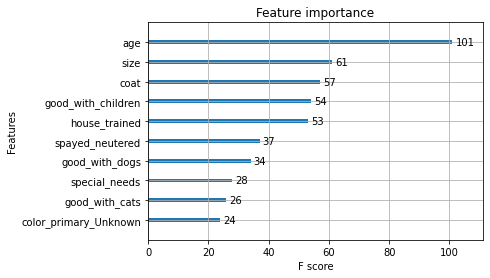

In [179]:
## Plot feature importance
from xgboost import plot_importance
plot_importance(model, max_num_features = 10)
plt.show()

work in progress.....